Counts  => TP, FN, FP, TN = 12 8 3 17
Accuracy:  0.725
Precision: 0.800
Recall:    0.600
Specificity:0.850
F1 score:  0.686


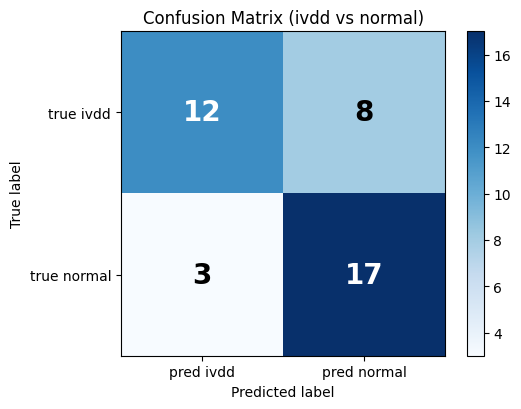

: 

In [ ]:
# -*- coding: utf-8 -*-
"""
2クラス（ivdd / normal）の混同行列を描画するサンプル（割合表示なし）。
- 行（縦）= 実際のラベル  [ivdd, normal]
- 列（横）= 予測のラベル  [ivdd, normal]
- 各セルには件数のみを表示
- 指標（Accuracy, Precision, Recall, Specificity, F1）を標準出力
"""
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントが必要なら有効化（任意）
# import matplotlib
# matplotlib.rcParams["font.family"] = "Meiryo"  # 例: Windows

def plot_confusion_matrix(tp, fn, fp, tn,
                          class_names=("ivdd", "normal"),
                          title="Confusion Matrix (ivdd vs normal)"):
    """
    混同行列を描画して Figure, Axes, 行列(np.ndarray)を返す。
    配列構造: [[TP, FN],
               [FP, TN]]
    """
    cm = np.array([[tp, fn],
                   [fp, tn]], dtype=int)

    fig, ax = plt.subplots(figsize=(5.6, 4.2))

    # 既存カラーマップ 'Blues'
    im = ax.imshow(cm, cmap='Blues', interpolation='nearest')
    # 比較用に濃淡を固定したい場合（任意）:
    # im = ax.imshow(cm, cmap='Blues', vmin=0, vmax=max(1, cm.max()), interpolation='nearest')

    # カラーバー
    ax.figure.colorbar(im, ax=ax)

    # 軸とラベル
    ax.set(
        xticks=np.arange(2),
        yticks=np.arange(2),
        xticklabels=[f"pred {n}" for n in class_names],
        yticklabels=[f"true {n}" for n in class_names],
        xlabel="Predicted label",
        ylabel="True label",
        title=title,
    )

    # セル内に「件数のみ」を描く（割合は表示しない）
    thresh = cm.max() / 2.0 if cm.size and cm.max() > 0 else 0
    for i in range(cm.shape[0]):      # 行（実際）
        for j in range(cm.shape[1]):  # 列（予測）
            count = cm[i, j]
            ax.text(
                j, i, f"{count}",
                ha="center", va="center",
                fontsize=20, fontweight="bold",
                color="white" if cm[i, j] > thresh else "black",
            )

    fig.tight_layout()
    return fig, ax, cm

def metrics_from_confusion(tp, fn, fp, tn):
    """主要指標をdictで返す（陽性=ivdd想定）。ゼロ割は0.0にフォールバック。"""
    total = tp + fn + fp + tn
    acc  = (tp + tn) / total if total else 0.0
    prec = tp / (tp + fp) if (tp + fp) else 0.0
    rec  = tp / (tp + fn) if (tp + fn) else 0.0  # sensitivity
    spec = tn / (tn + fp) if (tn + fp) else 0.0
    f1   = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0
    return {
        "accuracy": acc, "precision": prec, "recall": rec,
        "specificity": spec, "f1": f1
    }

if __name__ == "__main__":
    # ===== ここだけ書き換えて使う（見本値） =====
    TP = 12  # 正例(ivdd)をivddと予測
    FN = 8   # 正例(ivdd)をnormalと誤予測
    FP = 3   # 負例(normal)をivddと誤予測
    TN = 17  # 負例(normal)をnormalと予測

    CLASS_NAMES = ("ivdd", "normal")
    TITLE = "Confusion Matrix (ivdd vs normal)"
    # ==========================================

    fig, ax, cm = plot_confusion_matrix(TP, FN, FP, TN, CLASS_NAMES, TITLE)
    m = metrics_from_confusion(TP, FN, FP, TN)

    print("Counts  => TP, FN, FP, TN =", TP, FN, FP, TN)
    print("Accuracy:  {:.3f}".format(m["accuracy"]))
    print("Precision: {:.3f}".format(m["precision"]))
    print("Recall:    {:.3f}".format(m["recall"]))
    print("Specificity:{:.3f}".format(m["specificity"]))
    print("F1 score:  {:.3f}".format(m["f1"]))

    # 図を表示（保存したい場合は下の savefig を利用）
    plt.show()
    # fig.savefig("confusion_matrix_ivdd_normal.png", dpi=200, bbox_inches="tight")
